In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("customer_segmentation_data.csv")

# Display the first few rows of the dataset
df.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [4]:
# Display descriptive statistics
df.describe()

id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500  
50%             5.00000           27.000000            491.595000  
75%             8.00000           39.000000            747.170000  
max            10.00000           50.000000            999.740000

In [5]:
# Check for missing values
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

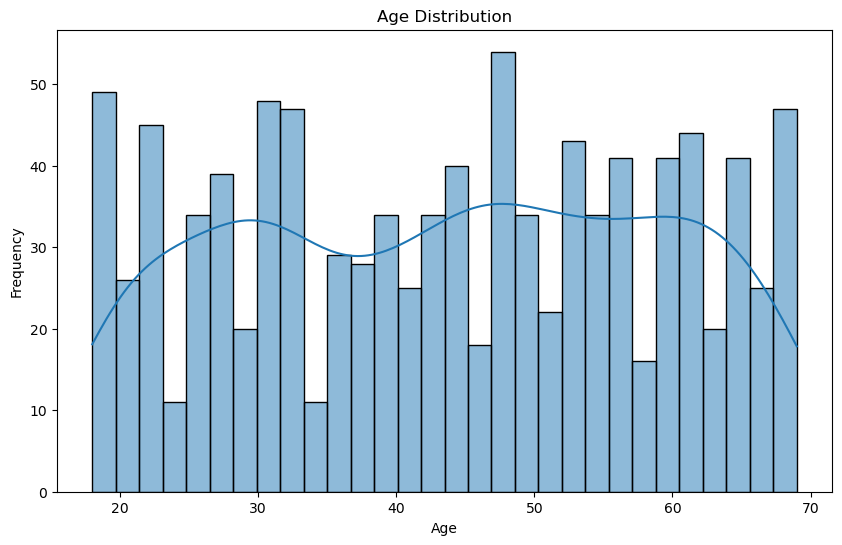

In [6]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

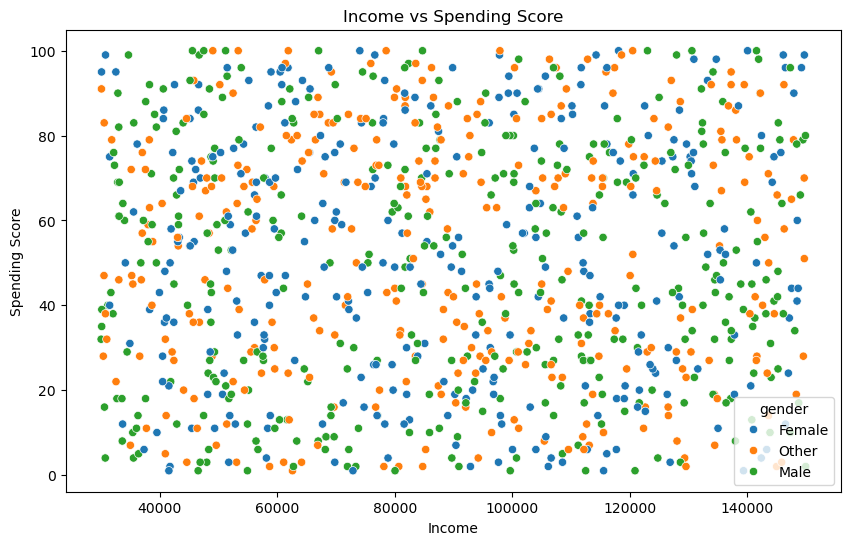

In [7]:
# Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending_score', data=df, hue='gender')
plt.title('Income vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

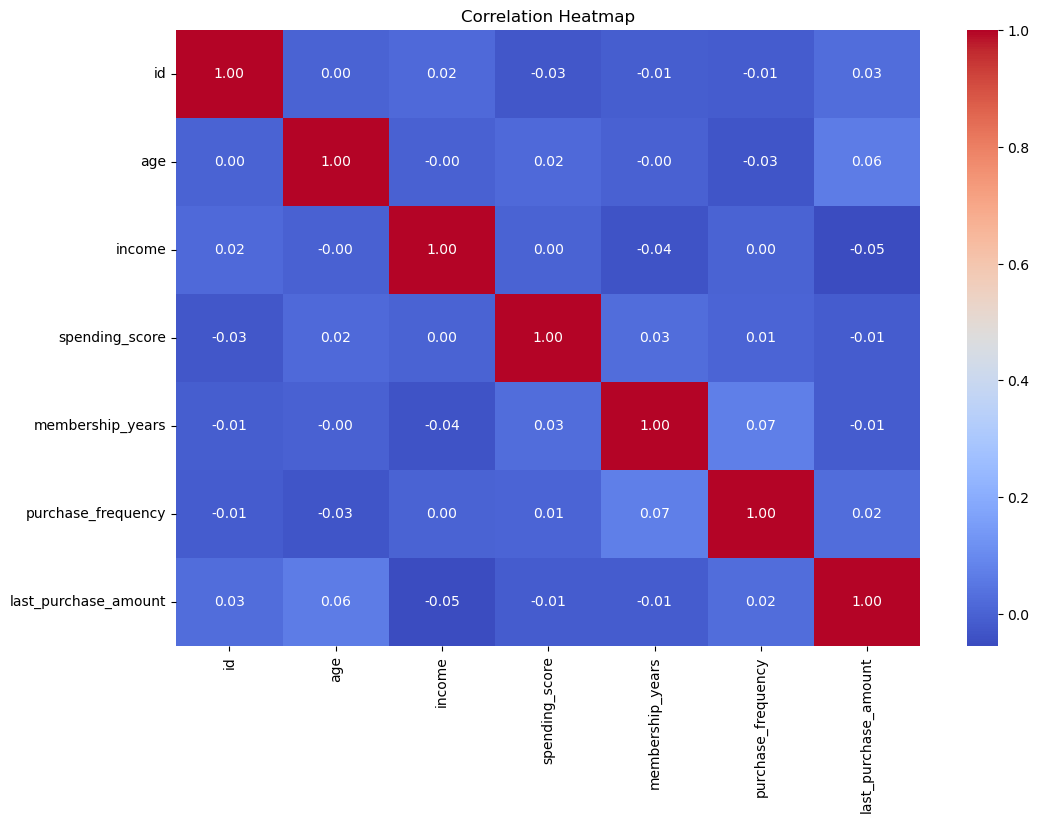

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = df[['age', 'income', 'membership_years', 'purchase_frequency', 'last_purchase_amount']]
y = df['spending_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 802.810749355414
R-squared: -0.011714680438657199


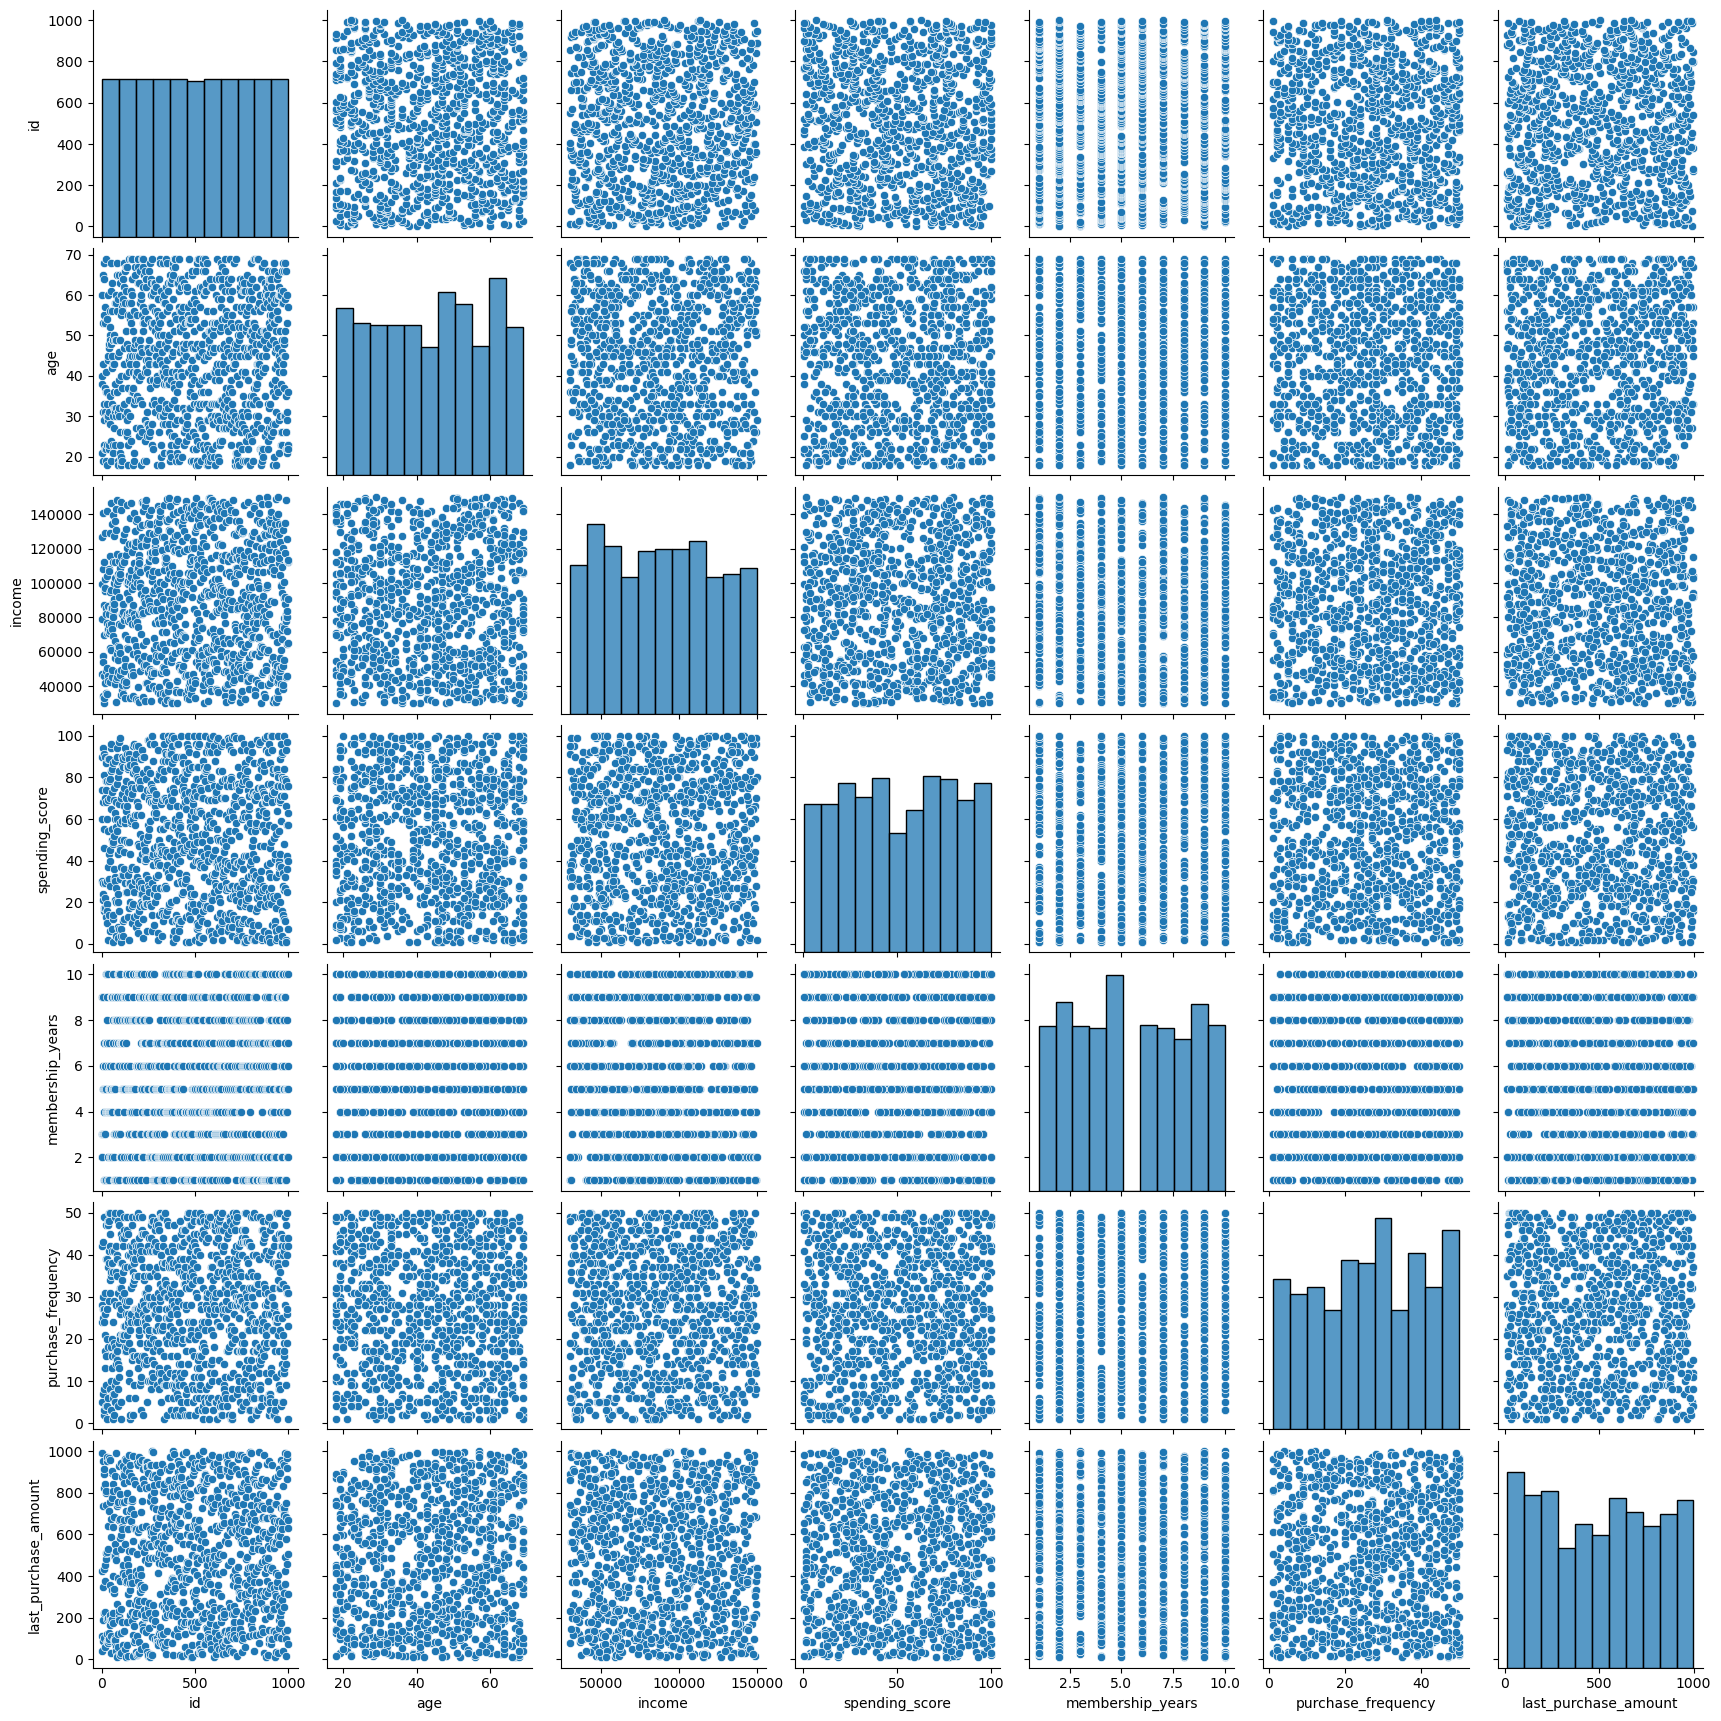

In [10]:
sns.pairplot(df)

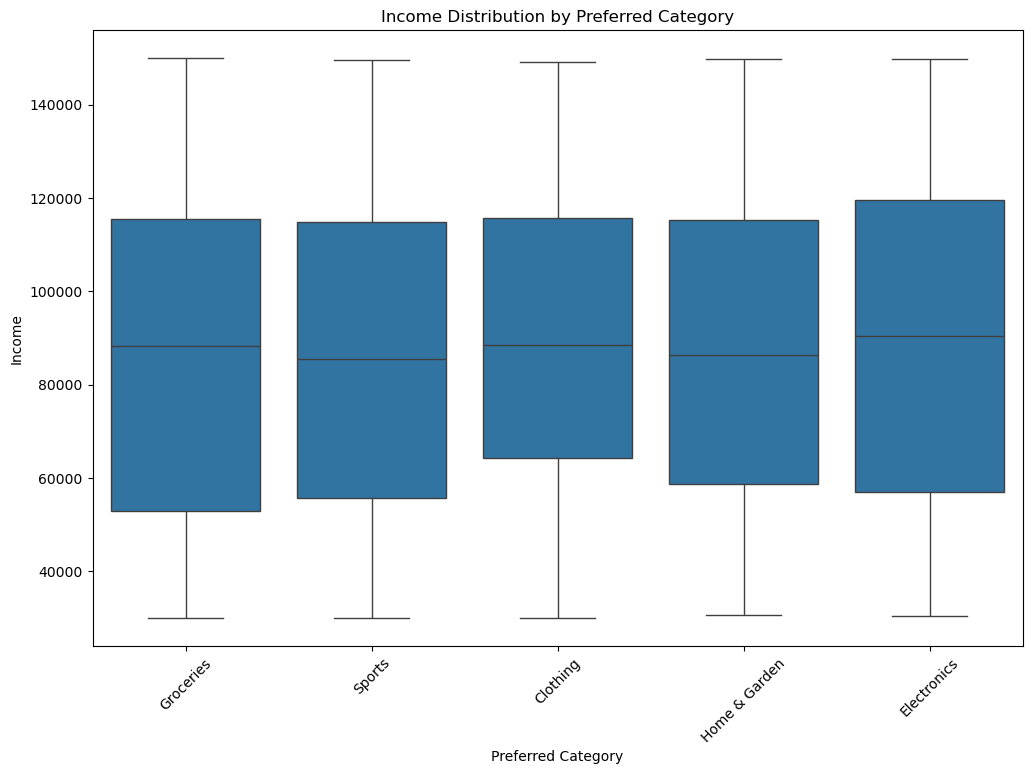

NameError: name 'data' is not defined

<Figure size 1200x800 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='preferred_category', y='income', data=df)
plt.title('Income Distribution by Preferred Category')
plt.xlabel('Preferred Category')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='gender', y='spending_score', data=data)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
print("\nCinsiyet ve Tercih Edilen Kategoriye Göre Gelir Ortalamaları:")
pivot_table = df.pivot_table(values='income', index='gender', columns='preferred_category', aggfunc='mean')
print(pivot_table)


Cinsiyet ve Tercih Edilen Kategoriye Göre Gelir Ortalamaları:
preferred_category      Clothing   Electronics     Groceries  Home & Garden  \
gender                                                                        
Female              93195.607143  88842.600000  83731.333333   85823.632353   
Male                87707.303571  87672.210526  88040.338028   92684.012987   
Other               87223.086207  90825.418919  91507.274194   87554.590164   

preferred_category        Sports  
gender                            
Female              89470.868852  
Male                88025.000000  
Other               85453.097222  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
df_clean = (df)

In [ ]:
df_clean['membership_years'].value_counts()

membership_years
5     125
2     109
9     108
6      96
10     96
3      95
1      95
7      94
4      94
8      88
Name: count, dtype: int64

In [ ]:
df_clean['purchase_frequency'].value_counts()

purchase_frequency
28    35
42    30
27    30
49    29
31    27
22    27
24    26
9     25
19    23
50    23
32    23
35    23
17    23
5     23
26    22
37    22
41    22
47    22
38    22
6     22
46    22
44    21
2     21
30    21
8     20
48    19
40    19
14    19
12    19
16    19
3     19
25    18
21    18
36    18
33    17
45    17
39    17
29    16
11    16
10    15
20    15
23    15
43    14
18    14
1     13
15    13
13    13
34    11
4     11
7     11
Name: count, dtype: int64

In [ ]:
df_clean['preferred_category'].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

In [ ]:
df_clean['last_purchase_amount'].value_counts()

last_purchase_amount
559.73    2
553.35    2
66.60     2
140.52    2
937.86    2
         ..
463.78    1
637.02    1
532.23    1
265.17    1
669.26    1
Name: count, Length: 994, dtype: int64

In [ ]:
df_clean['spending_score'].value_counts()

spending_score
3774996    1
2844090    1
4073230    1
4807890    1
2354418    1
          ..
3127516    1
1457952    1
1097586    1
4946472    1
3255120    1
Name: count, Length: 1000, dtype: int64

In [ ]:
df_clean['income'].value_counts()

income
49020     2
39407     2
137307    2
61376     2
54274     1
         ..
71688     1
48445     1
136928    1
112118    1
90420     1
Name: count, Length: 996, dtype: int64

In [ ]:
df_clean['gender'].value_counts()

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

In [ ]:
df_clean['age'].value_counts()

age
47    32
30    30
33    29
45    29
53    28
19    28
69    28
64    27
41    25
61    24
43    23
60    23
23    23
48    22
51    22
22    22
18    21
57    21
26    21
56    20
27    20
63    20
29    20
62    20
68    19
28    19
54    18
46    18
59    18
32    18
49    18
31    18
40    18
36    17
39    16
58    16
38    16
50    16
55    16
52    15
66    15
21    14
65    14
25    13
35    12
37    12
20    12
42    11
24    11
44    11
34    11
67    10
Name: count, dtype: int64

In [ ]:
df_clean['id'].value_counts()

id
3774996    1
2844090    1
4073230    1
4807890    1
2354418    1
          ..
3127516    1
1457952    1
1097586    1
4946472    1
3255120    1
Name: count, Length: 1000, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.015


In [ ]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.015


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_train.value_counts())

spending_score
96     15
27     15
70     15
100    14
29     13
       ..
97      3
65      3
5       2
35      2
15      2
Name: count, Length: 100, dtype: int64


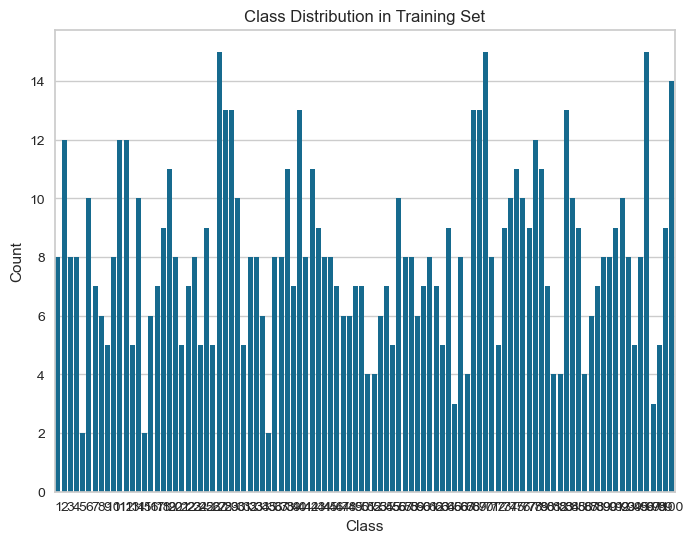

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable (y_train)
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#scaler = MinMaxScaler((0, 1))
#df_rfm = scaler.fit_transform(rfm.loc[:,['log_Recency','log_Frequency','log_Monetary']])
rfm = (df)
df_rfm = (df)
df_rfm=np.array(rfm.loc[:,['spending_score','income','age']])

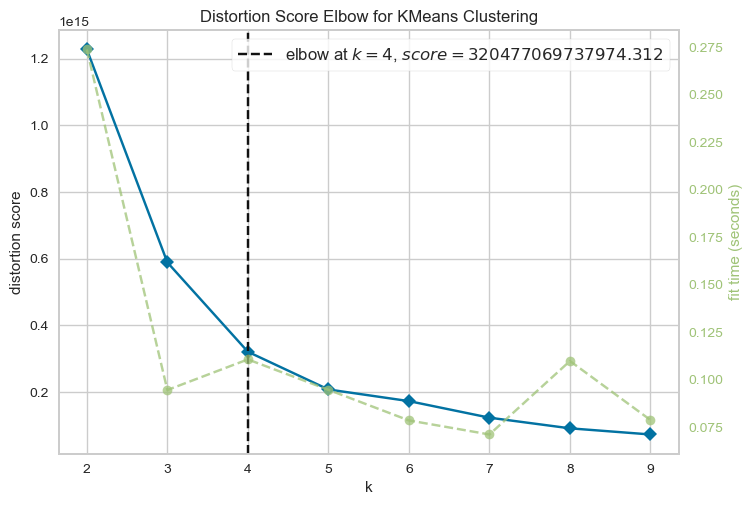

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_rfm) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['age', 'income']])

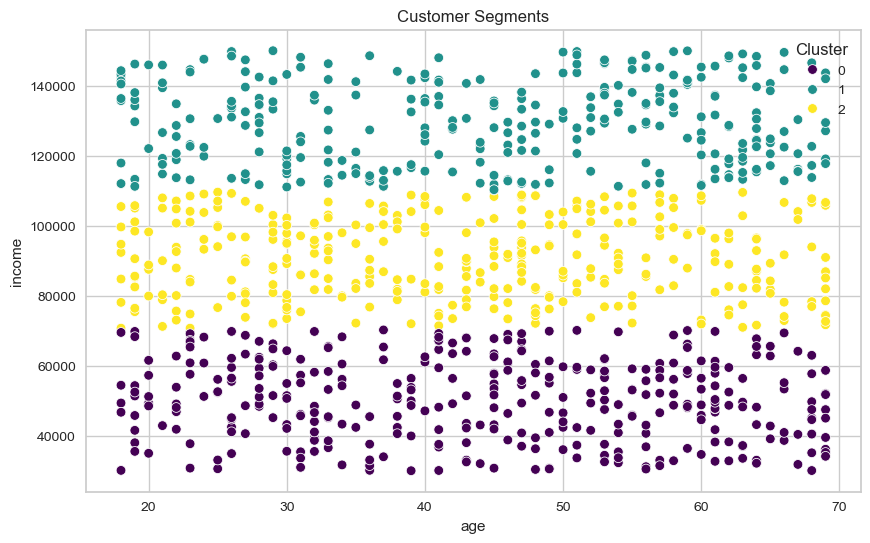

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='income',
hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [ ]:
km_mdl = KMeans(n_clusters=4, random_state=32)

km = km_mdl.fit_predict(df_rfm)

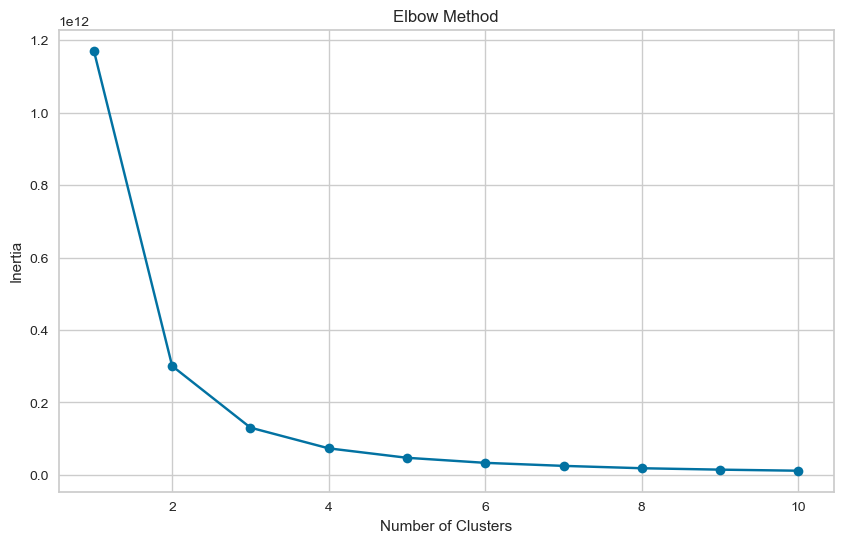

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df[['age', 'income']])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

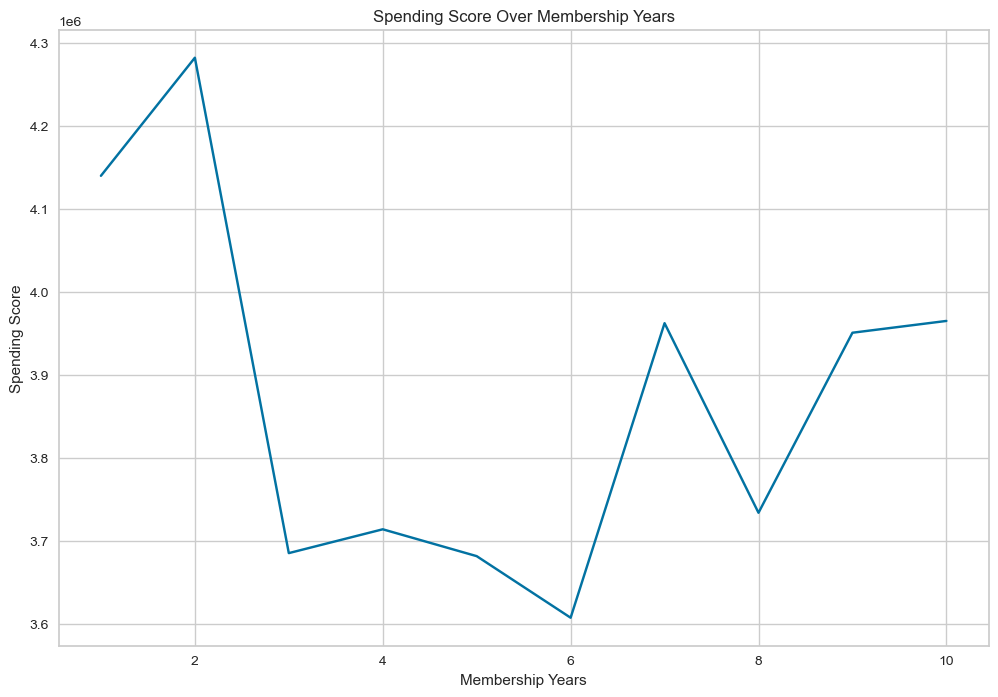

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='membership_years', y='spending_score', data=df, ci=None)
plt.title('Spending Score Over Membership Years')
plt.xlabel('Membership Years')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
np.unique(km)

array([0, 1, 2, 3])

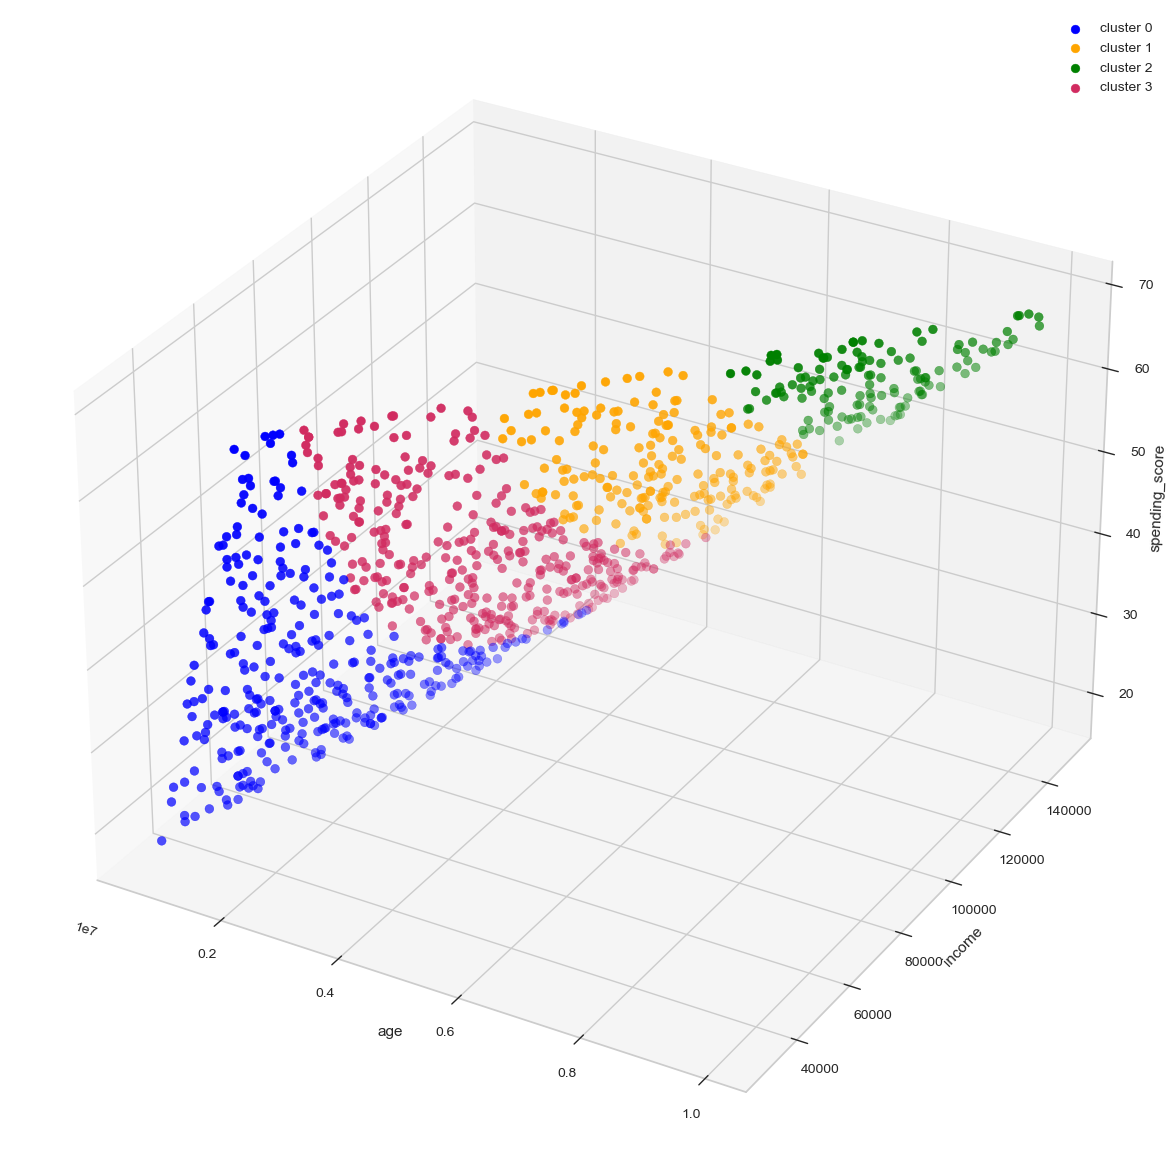

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm[km == 0,0],df_rfm[km == 0,1],df_rfm[km == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df_rfm[km == 1,0],df_rfm[km == 1,1],df_rfm[km == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(df_rfm[km == 2,0],df_rfm[km == 2,1],df_rfm[km == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(df_rfm[km == 3,0],df_rfm[km == 3,1],df_rfm[km == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('age')
ax.set_ylabel('income')
ax.set_zlabel('spending_score')
ax.legend()
plt.show()

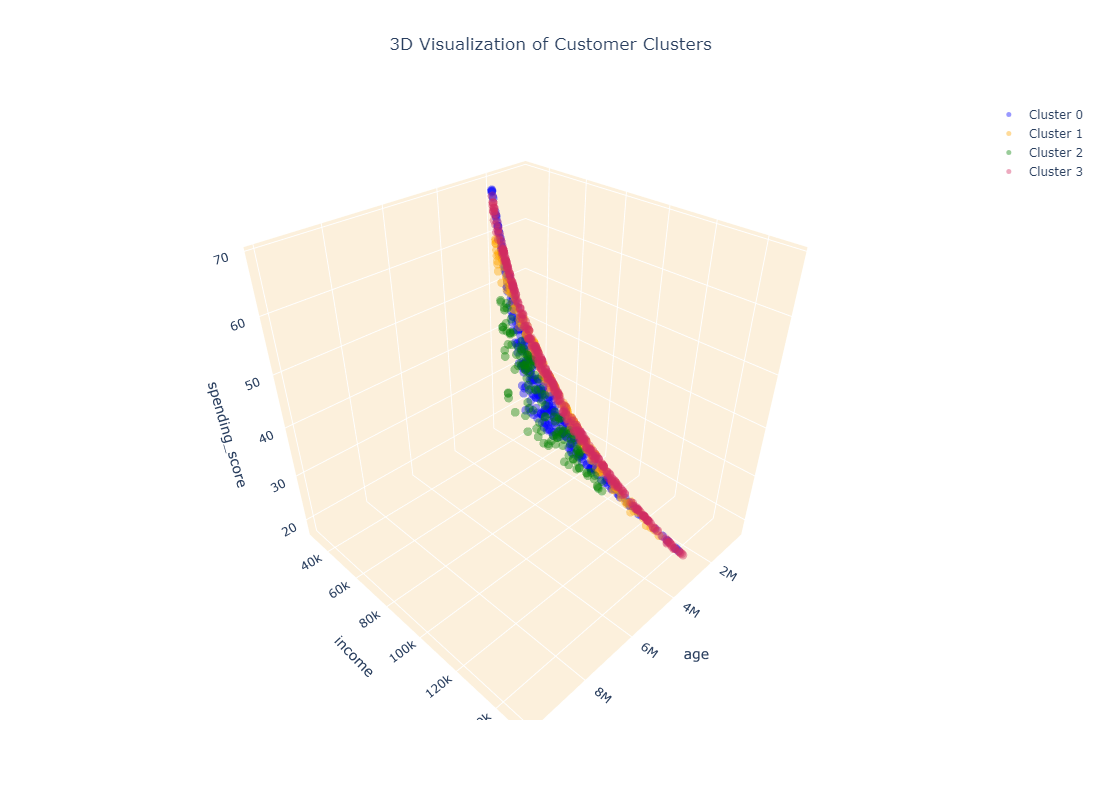

In [ ]:
colors = ['blue', 'orange', 'green', '#D12B60']

# Create a 3D scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_rfm[km == 0,0], y=df_rfm[km == 0,1], z=df_rfm[km == 0,2], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=df_rfm[km == 1,0], y=df_rfm[km == 1,1], z=df_rfm[km == 1,2], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=df_rfm[km == 2,0], y=df_rfm[km == 2,1], z=df_rfm[km == 2,2],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=df_rfm[km == 3,0], y=df_rfm[km == 3,1], z=df_rfm[km == 3,2],
                           mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='Cluster 3'))

fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='age'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='income'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='spending_score'),
    ),
    width=900,
    height=800
)
fig.show()

In [ ]:
r_quarters = rfm['age'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
f_quarters = rfm['income'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
m_quarters = rfm['spending_score'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), 
                      columns=['Q_age','Q_income', 'Q_spending_score'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
quartile_spread

Q_age   Q_income  Q_spending_score
min           18.0   30004.00          541836.0
first_part    30.0   57911.75         2274988.5
second_part   45.0   87845.50         3341736.0
third_part    57.0  116110.25         5205102.0
max           69.0  149973.00         9963292.0

In [ ]:
rfm['r_score'] = pd.cut(rfm['age'], bins=r_quarters, labels=[4,3,2,1],include_lowest=True)
rfm['f_score'] = pd.cut(rfm['income'], bins=f_quarters, labels=[1,2,3,4],include_lowest=True)
rfm['m_score'] = pd.cut(rfm['spending_score'], bins=m_quarters, labels=[1,2,3,4],include_lowest=True)
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

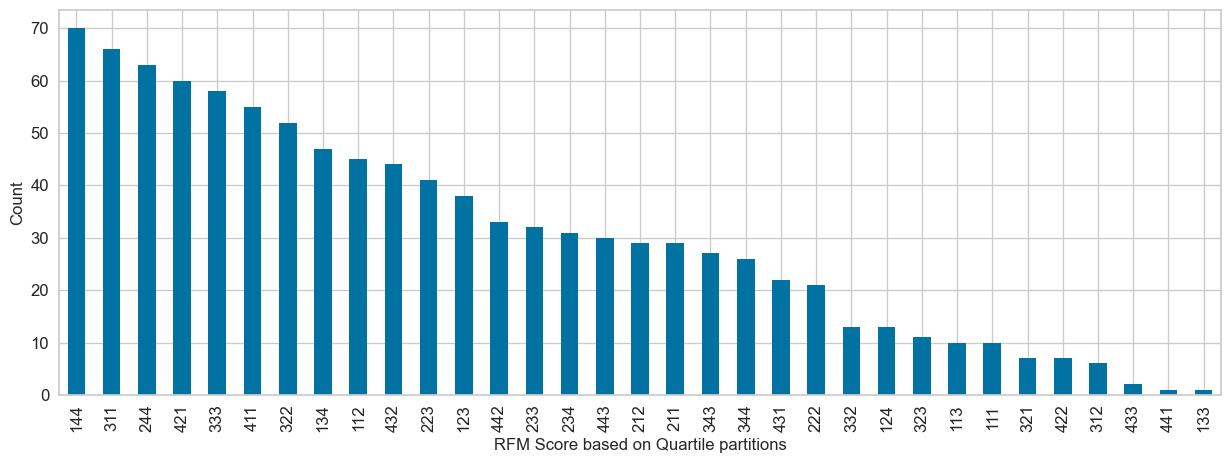

In [ ]:
ax = rfm['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score based on Quartile partitions", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [ ]:
rfm['KMean_Segment'] = km

In [ ]:
rfm[["KMean_Segment","age","income","spending_score"]].groupby(["KMean_Segment"]).agg(["mean","count"])

age               income       spending_score      
                    mean count           mean count           mean count
KMean_Segment                                                           
0              33.315625   320   59995.156250   320   1.788602e+06   320
1              51.574257   202  107836.886139   202   5.403601e+06   202
2              60.681818   132  130922.113636   132   7.906426e+06   132
3              42.468208   346   87391.849711   346   3.372683e+06   346

In [ ]:
rfm['KMean_Segment'] = rfm['KMean_Segment'].astype(str)
km_map = {
    r'0': 'Low priority',
    r'1': 'Loyal',
    r'3': 'New',
    r'2': 'Core',
}

rfm['KMeans_seg_trans'] = rfm['KMean_Segment'].replace(km_map, regex=True)

In [ ]:
rfm.head()

id  age  gender  income  spending_score  membership_years  \
0  3774996   38  Female   99342         3774996                 3   
1  1655892   21  Female   78852         1655892                 2   
2  7594380   60  Female  126573         7594380                 2   
3  1883960   40   Other   47099         1883960                 9   
4  9140365   65  Female  140621         9140365                 3   

   purchase_frequency preferred_category  last_purchase_amount r_score  \
0                  24          Groceries                113.53       3   
1                  42             Sports                 41.93       4   
2                  28           Clothing                424.36       1   
3                   5      Home & Garden                991.93       3   
4                  25        Electronics                347.08       1   

  f_score m_score rfm_score KMean_Segment KMeans_seg_trans  
0       3       3       333             3              New  
1       2       1       421             0     Low priority  
2       4       4       144             2             Core  
3       1       1       311             0     Low priority  
4       4       4       144             2             Core

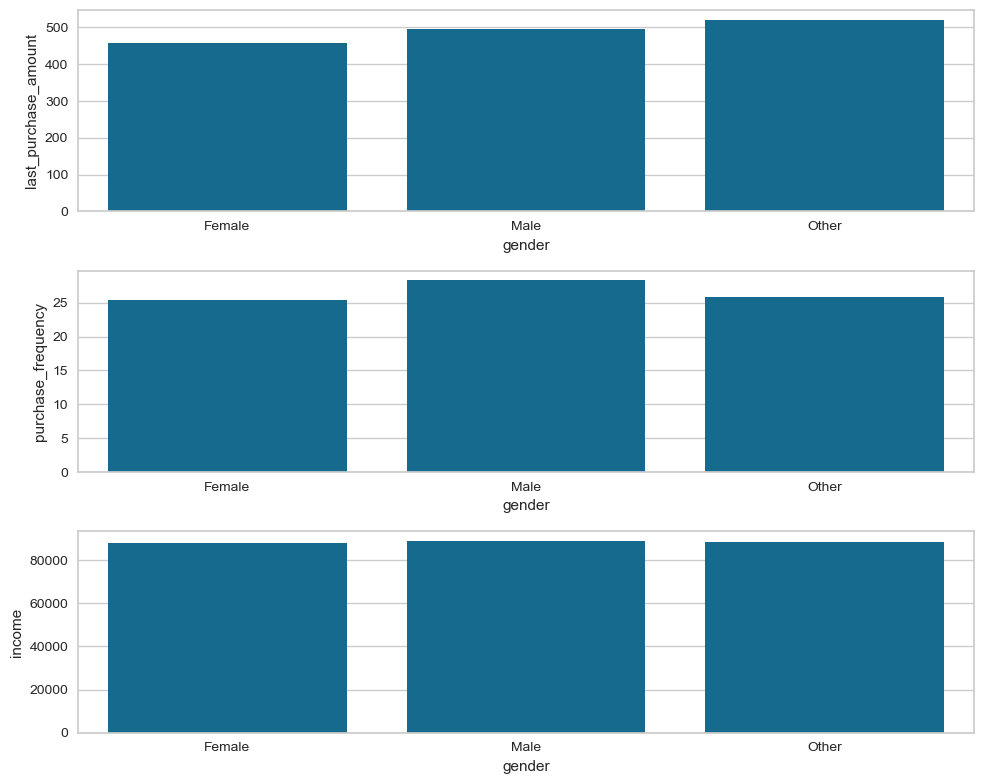

In [ ]:
cluster_mean = df.groupby('gender')[['last_purchase_amount', 'purchase_frequency', 'income']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(10, 8))

sns.barplot(cluster_mean, x='gender', y='last_purchase_amount', ax=axes[0])
sns.barplot(cluster_mean, x='gender', y='purchase_frequency', ax=axes[1])
sns.barplot(cluster_mean, x='gender', y='income', ax=axes[2])

plt.tight_layout()

In [ ]:
import pandas as pd
import plotly.express as px
from summarytools import dfSummary

In [ ]:
 dfSummary(df)

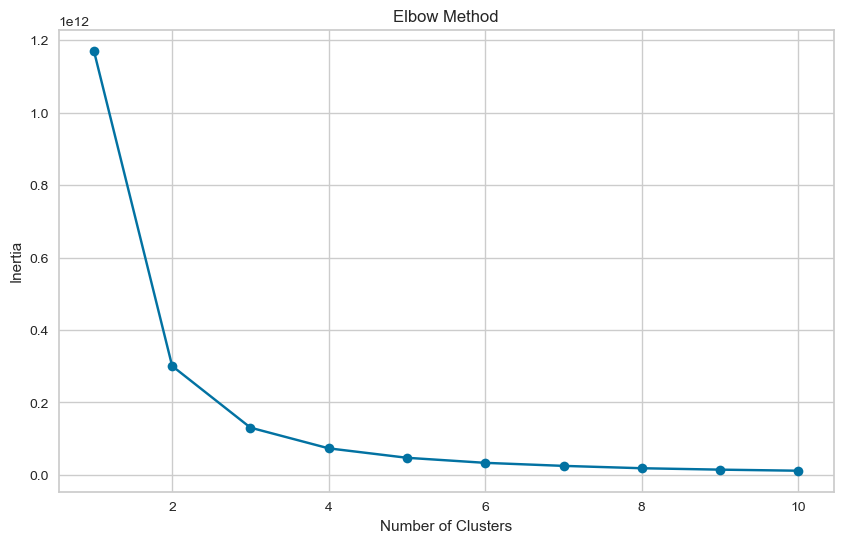

Text(0, 0.5, 'inertia')

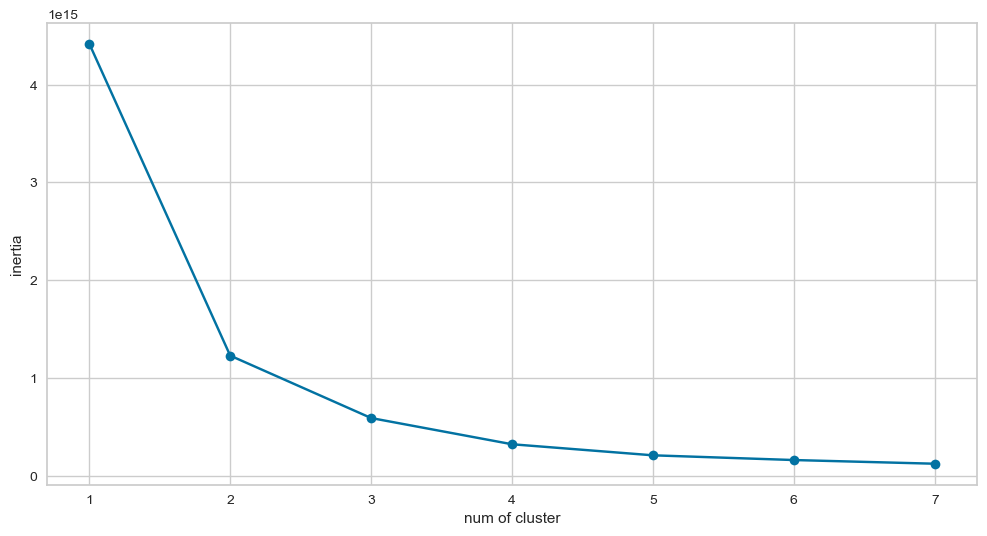

In [ ]:
SSE=[]
for cluster in range(1,8):
    kmeans=KMeans(n_clusters=cluster,init='k-means++')
    kmeans.fit(df_rfm)
    SSE.append(kmeans.inertia_)
frame=pd.DataFrame({'cluster':range(1,8),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['cluster'],frame['SSE'],marker='o')
plt.xlabel("num of cluster")
plt.ylabel("inertia")

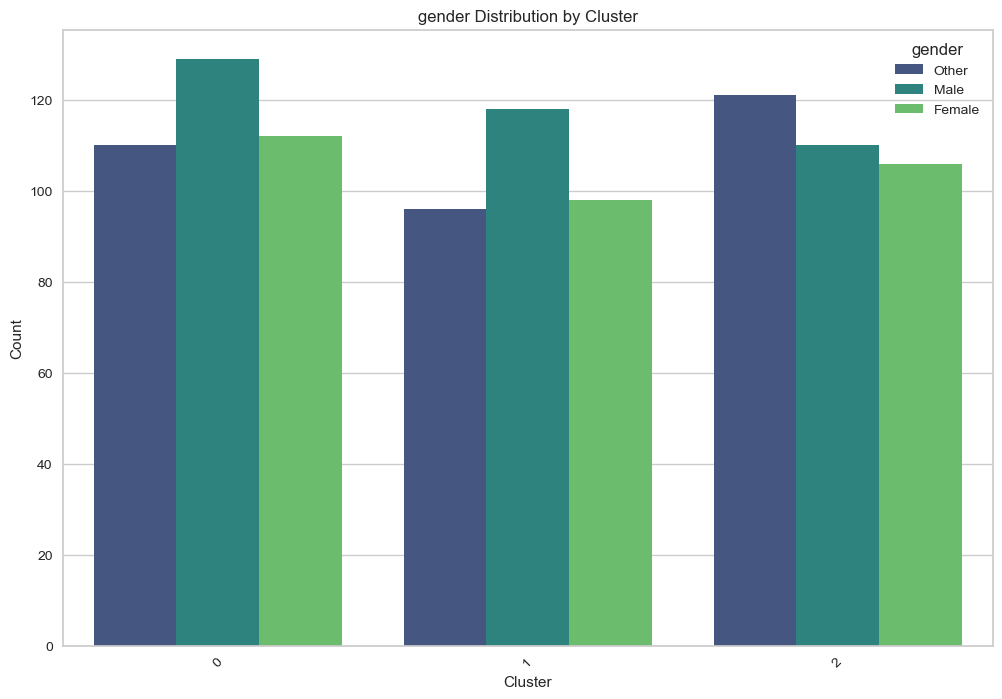

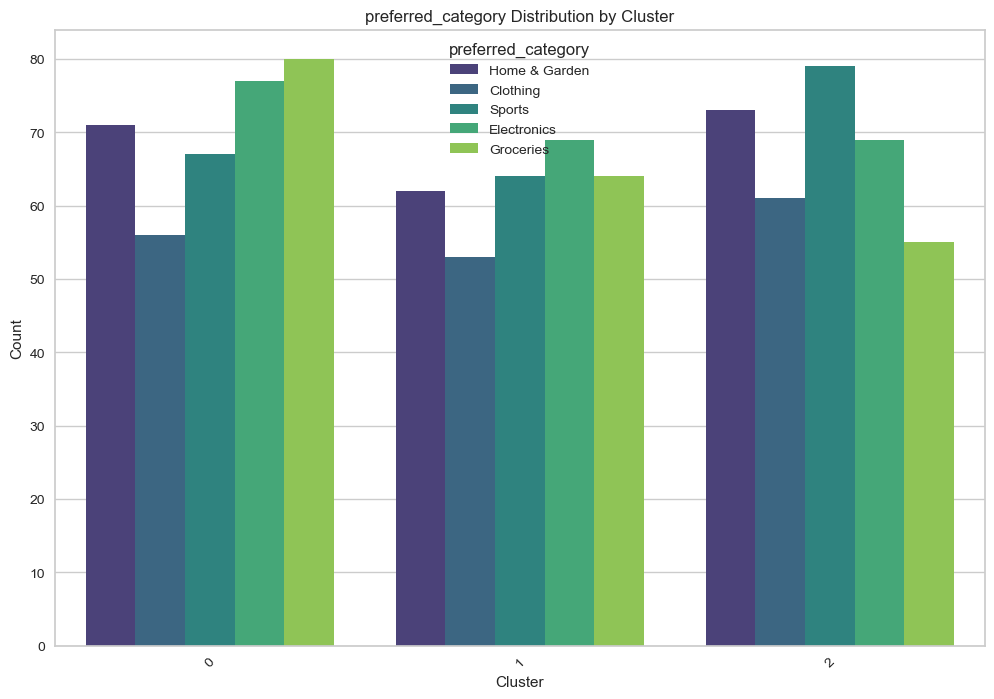

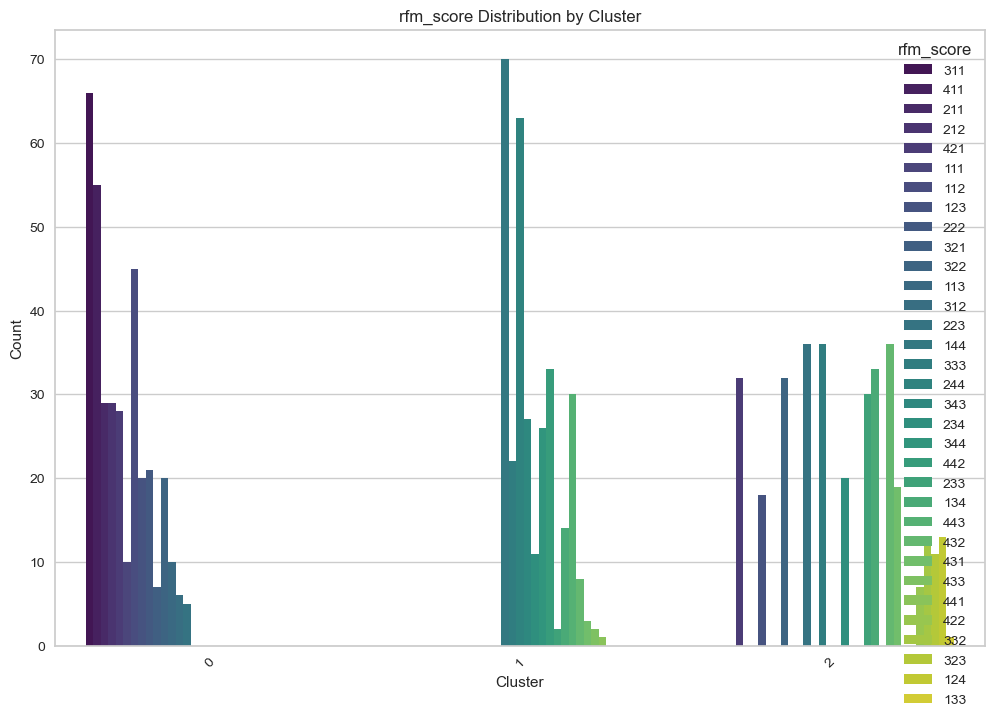

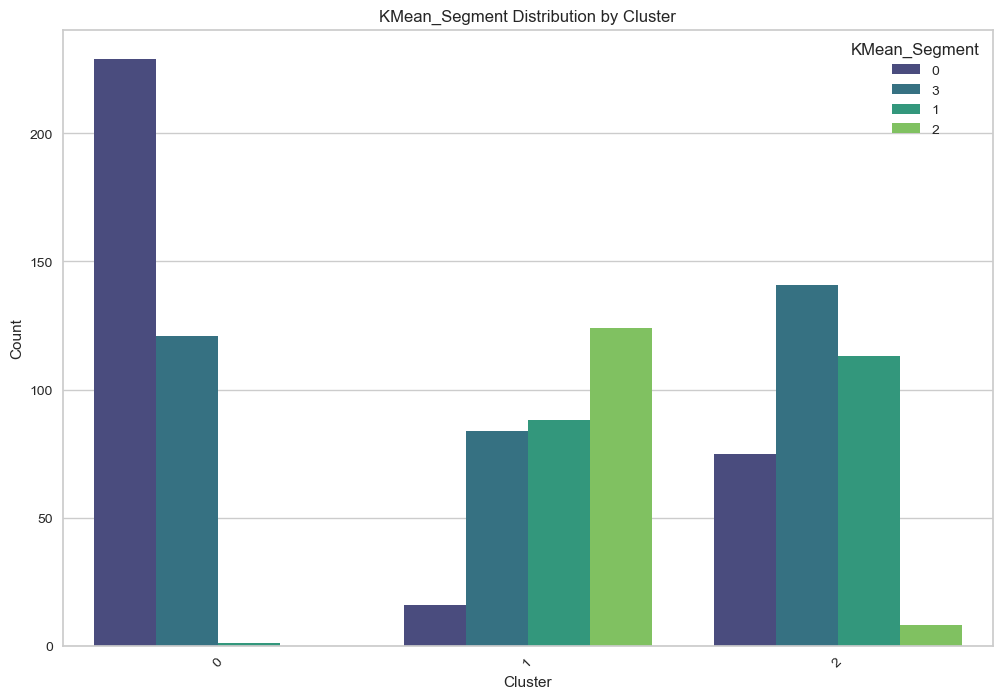

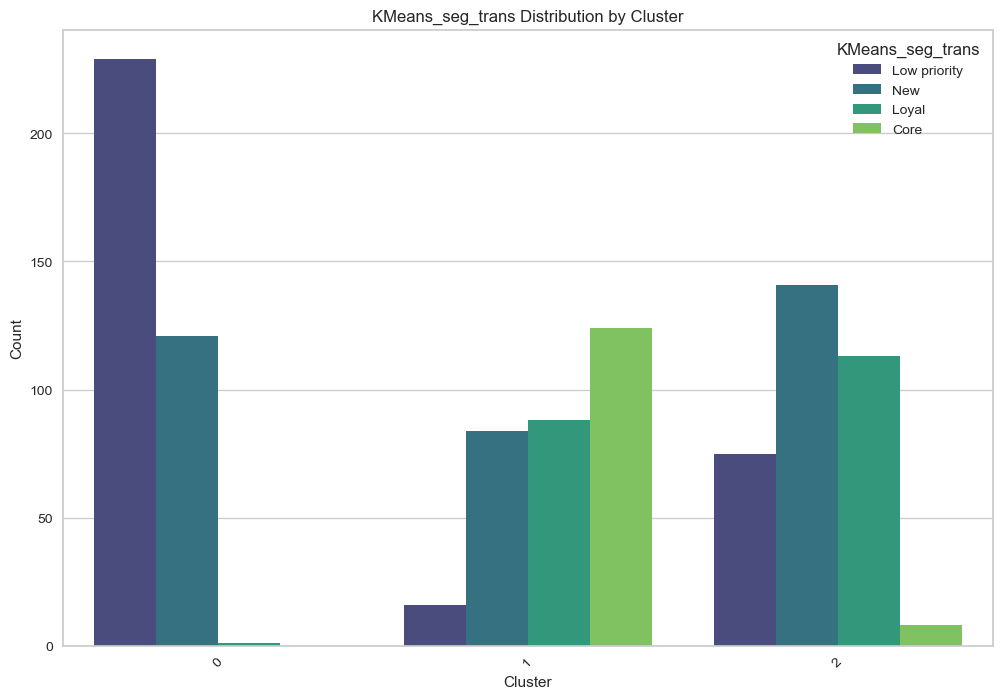

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Cluster', hue=col, data=df, palette='viridis')
    plt.title(f'{col} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

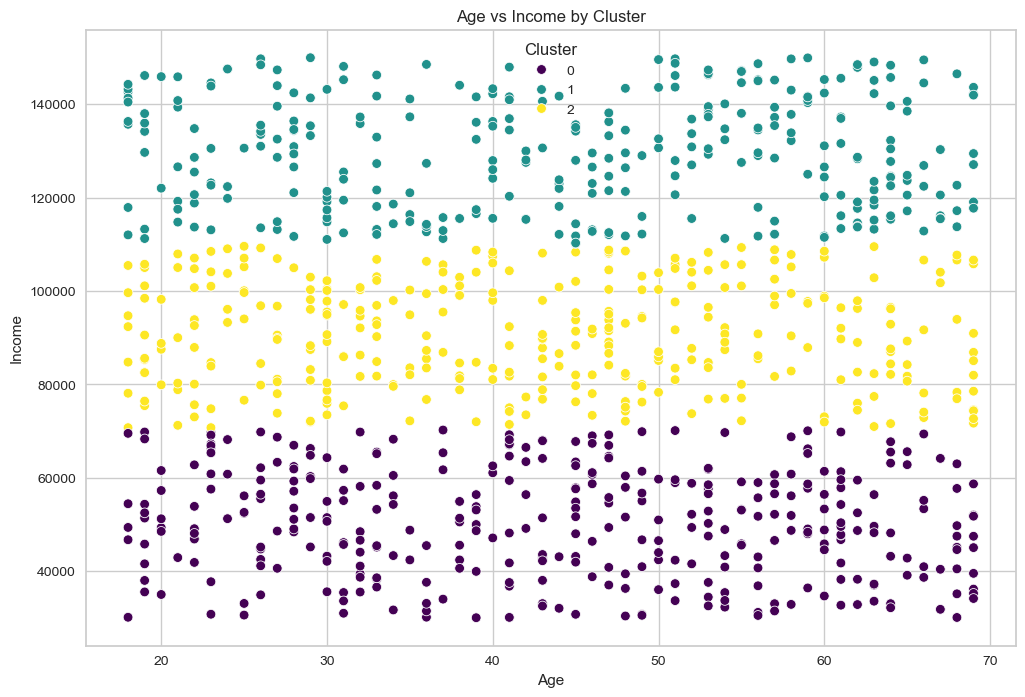

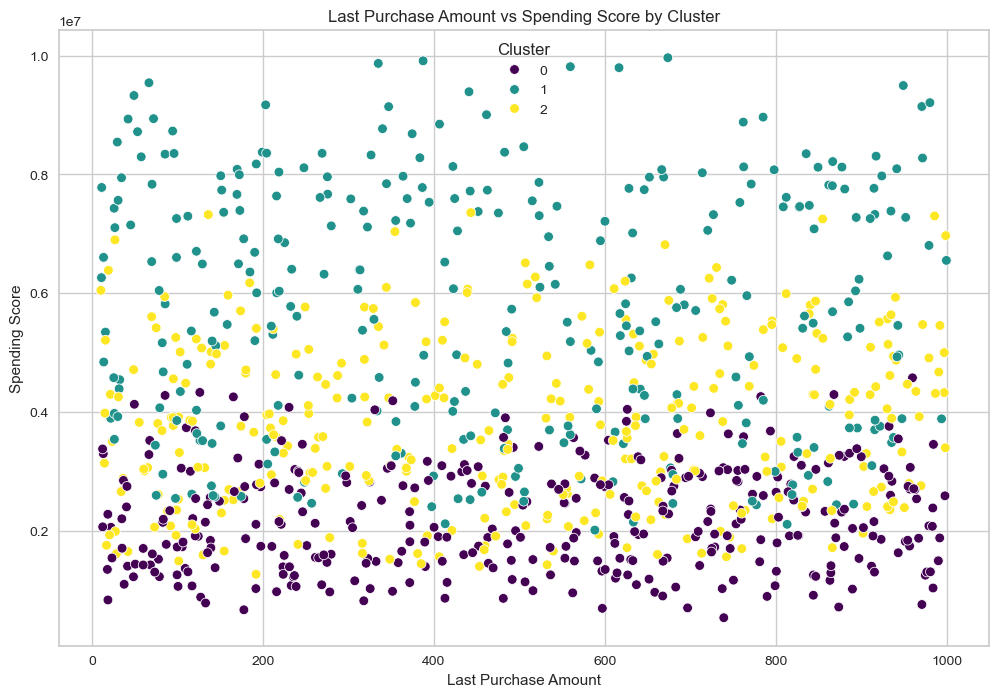

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='income', hue='Cluster', data=df, palette='viridis')
plt.title('Age vs Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Harcama skoru ve son satın alma miktarı arasındaki ilişkiyi inceliyorum
plt.figure(figsize=(12, 8))
sns.scatterplot(x='last_purchase_amount', y='spending_score', hue='Cluster', data=df, palette='viridis')
plt.title('Last Purchase Amount vs Spending Score by Cluster')
plt.xlabel('Last Purchase Amount')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=10,init='k-means++')
kmeans.fit(df_rfm)

KMeans(n_clusters=10)

In [ ]:
'''
app = Flask(__myfinalproject__)

# Load your pre-trained clustering model
with open('Customer Segmention.pkl', 'rb') as file:
    clustering_model = pickle.load(file)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict_cluster', methods=['POST'])
def predict_cluster():
    try:
        # Get input values from the form
        recency = float(request.form['recency'])
        frequency = float(request.form['frequency'])
        monetary_value = float(request.form['monetary_value'])

        # Make predictions using the loaded clustering model
        cluster_value = clustering_model.predict([[recency, frequency, monetary_value]])[0]

        # Render the result in the HTML template
        return render_template('index.html', cluster=cluster_value)

    except Exception as e:
        return render_template('index.html', error=str(e))

if __name__ == '__main__':
    app.run(debug=True)
'''

"\napp = Flask(__myfinalproject__)\n\n# Load your pre-trained clustering model\nwith open('Customer Segmention.pkl', 'rb') as file:\n    clustering_model = pickle.load(file)\n\n@app.route('/')\ndef home():\n    return render_template('index.html')\n\n@app.route('/predict_cluster', methods=['POST'])\ndef predict_cluster():\n    try:\n        # Get input values from the form\n        recency = float(request.form['recency'])\n        frequency = float(request.form['frequency'])\n        monetary_value = float(request.form['monetary_value'])\n\n        # Make predictions using the loaded clustering model\n        cluster_value = clustering_model.predict([[recency, frequency, monetary_value]])[0]\n\n        # Render the result in the HTML template\n        return render_template('index.html', cluster=cluster_value)\n\n    except Exception as e:\n        return render_template('index.html', error=str(e))\n\nif __name__ == '__main__':\n    app.run(debug=True)\n"